# Distribucion uniforme

In [1]:
%config IPCompleter.greedy=True

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
a = 1     #Limite inferior
b = 100   #Limite superior
n = 100000   #Numero de muestras
data = np.random.uniform(a, b, n)
#Con esto formamos una muestra de datos uniforme, es decir que todos tienen la misma probabilidad de que aparezcan

(array([10064., 10234., 10055.,  9881.,  9977.,  9940., 10184.,  9921.,
         9885.,  9859.]),
 array([ 1.00081394, 10.90051678, 20.80021962, 30.69992246, 40.5996253 ,
        50.49932814, 60.39903098, 70.29873382, 80.19843666, 90.0981395 ,
        99.99784234]),
 <a list of 10 Patch objects>)

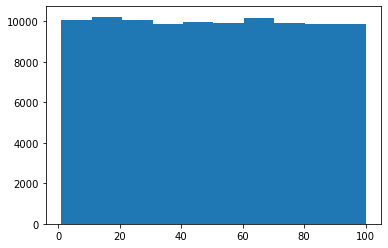

In [13]:
%matplotlib inline
plt.hist(data)

# Distribucion normal

In [19]:
#randn es para generar numeros aleatorios en distribucion normal
#Entre parentesis va el numero de datos que quieres generar
data = np.random.randn(1000000)

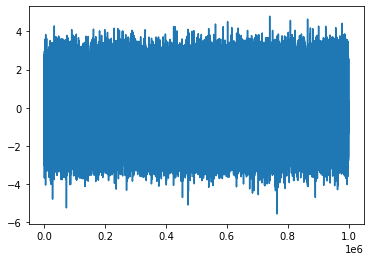

In [20]:
x = range(1, 1000001)
#En el eje de los x tendremos un rango de 1 a 100
#En el eje de las y tendremos los numeros aleatorios que hemos generado
plt.plot(x, data)

(array([7.00000e+00, 2.46000e+02, 7.09000e+03, 7.17660e+04, 2.73558e+05,
        3.91718e+05, 2.10333e+05, 4.20690e+04, 3.13100e+03, 8.20000e+01]),
 array([-5.55303444, -4.51813359, -3.48323274, -2.44833189, -1.41343104,
        -0.37853019,  0.65637066,  1.69127151,  2.72617236,  3.76107321,
         4.79597406]),
 <a list of 10 Patch objects>)

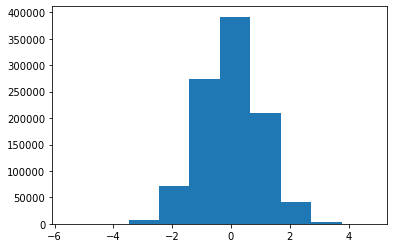

In [21]:
#Si generamos un histograma de los datos que hemos generado, saldra una campana de Gauss
plt.hist(data)

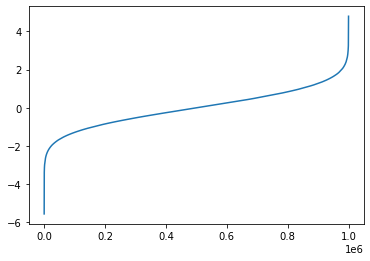

In [22]:
plt.plot(x, sorted(data))
#Funcion de distribucion acumulada

(array([  30.,  190.,  847., 1981., 2840., 2388., 1213.,  417.,   78.,
          16.]),
 array([-3.13269267, -1.30093726,  0.53081815,  2.36257356,  4.19432897,
         6.02608438,  7.85783979,  9.6895952 , 11.52135061, 13.35310602,
        15.18486143]),
 <a list of 10 Patch objects>)

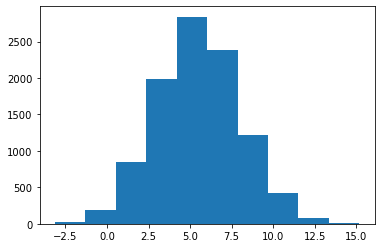

In [25]:
# Si yo quiero mi propia media, que no sea centro 0 y desviacion 1
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
data = mu + sd * Z
# Z = (x - mu) / sd -> N(0,1), x = mu + sd * Z
plt.hist(data)

In [26]:
#A la funcion randn, ademas de especificarle la cantidad de numeros aleatorios de normal 0,1 que quieres obtener
#se le puede especificar un array de numeros para obtener diferentes versiones de la normal
data = np.random.randn(2, 4)
data 
#Nos retornara 2 arrays de tamaño 4, cada uno de ellos conformara una campana de Gauss

array([[ 1.41044553, -2.06585313, -0.2464082 ,  0.32815603],
       [-0.13732902,  1.62429034,  1.31042391,  0.498185  ]])

# La simulacion de Monte Carlo
##### Dice que cualquier probabilidad multiplicada x 4 = Pi

* Generamos dos numeros aleatorios uniformes (x, y) entre 0 y 1
* Calcularemos x * x + y * y
    * Si el valor es inferior a 1 -> estamos dentro del circulo
    * Si el valor es superior a 1 -> estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo
* Usamos dicha probabilidad para aproximar el valor de pi
* Repetimos el experimento un numero suficiente de veces, para obtener diferentes aproximaciones de pi
* Calculamos el promedio de los n experimentos anteriores para dar un valor final de pi

3.1441999999999997


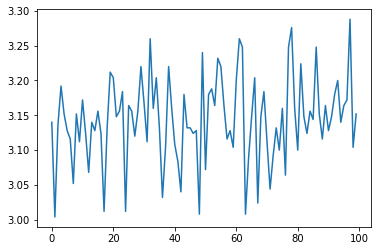

In [32]:
pi_avg = 0
n = 1000
pi_value_list = []
for i in range(100):
    value = 0
    x = np.random.uniform(0, 1, n).tolist()
    y = np.random.uniform(0, 1, n).tolist()
    for j in range(n):
        z = np.sqrt(x[j] * x[j] + y[j] * y[j])
        if z <= 1:
            value += 1
    float_value = float(value)
    pi_value = float_value * 4 / n
    pi_value_list.append(pi_value)
    pi_avg += pi_value
pi = pi_avg/100
print(pi)
plt.plot(pi_value_list)

# Dummy Data Sets

In [36]:
#Creamos un data frame a partir de un diccionario
#El nombre de las columnas seran los alias
#Los valores en las filas seran dados por numpy.random, de las formas que hemos visto en las clases pasadas
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),                #n Numeros aleatorios, con desviacion normal
        'B' : 1.5 + 2.5 * np.random.randn(n),    #n numeros aleatorios, con desviaicon normal, la mu = 1.5, ds = 2.5
        'C' : np.random.uniform(5, 32, n)        #n numeros aleatorios uniformes, entre 5 y 32
    }
)

In [37]:
data.head()

,A,B,C
0,-0.893179,5.130931,29.169086
1,-0.044157,0.399604,27.957770
2,-1.382001,5.680538,29.030657
3,2.210265,6.077936,23.342500
4,-1.715254,-5.199662,8.663685


In [38]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000227,1.499910,18.499928
std,0.999282,2.501710,7.787191
min,-4.649682,-10.081081,5.000006
25%,-0.675042,-0.189732,11.759219
50%,-0.000831,1.500360,18.499122
75%,0.674615,3.188792,25.240978
max,4.851161,13.146797,31.999998


In [39]:
data = pd.read_csv("/Users/Rudy/Documents/Github/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [40]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [42]:
column_names = data.columns.values.tolist()

In [44]:
a = len(column_names)
a

21

In [45]:
new_data = pd.DataFrame(
    {
        'Colum Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0, 1, a)
    }
)

In [46]:
new_data

,Colum Name,A,B
0,State,-0.742501,0.839803
1,Account Length,0.740588,0.870131
2,Area Code,-0.214047,0.380088
3,Phone,-0.829333,0.159065
4,Int'l Plan,0.828036,0.095154
5,VMail Plan,-0.183065,0.363642
6,VMail Message,0.026818,0.074555
7,Day Mins,-0.293264,0.652322
8,Day Calls,-1.339722,0.216573
9,Day Charge,-1.290746,0.129638


In [47]:
#Podemos manipular los numeros de los renglones
new_data2 = pd.DataFrame(
    {
        'Colum Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0, 1, a)
    }, index = range(42, 42 + a)
)

In [48]:
new_data2

,Colum Name,A,B
42,State,-0.335340,0.560965
43,Account Length,-2.084438,0.742703
44,Area Code,0.005199,0.962919
45,Phone,-0.627853,0.792215
46,Int'l Plan,-0.192481,0.711821
47,VMail Plan,-1.819341,0.193613
48,VMail Message,1.010188,0.588825
49,Day Mins,0.634879,0.301722
50,Day Calls,0.831038,0.819296
51,Day Charge,-0.874039,0.149589
